**Comcast Telecom Consumer Complaints.**

import library

In [2]:
library(stringi)
library(lubridate)
library(dplyr)
library(ggplot2)

 Import data into R environment.

In [3]:
comcast_data<- read.csv("Comcast Telecom Complaints data.csv",header = TRUE)
#Manipulating column names
names(comcast_data)<- stri_replace_all(regex =  "\\.",replacement = "",str =names(comcast_data))
head(comcast_data)

,Ticket,CustomerComplaint,Date,Time,ReceivedVia,City,State,Zipcode,Status,FilingonBehalfofSomeone
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,250635,Comcast Cable Internet Speeds,22-04-2015,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
2,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
3,242732,Speed and Service,18-04-2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
4,277946,Comcast Imposed a New Usage Cap of 300GB that punishes streaming.,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
5,307175,Comcast not working and no service to boot,26-05-2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
6,338519,ISP Charging for arbitrary data limits with overage fees,6/12/2015,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No


Finding nulls in dataset

In [4]:
na_vector <- is.na(comcast_data)
length(na_vector[na_vector==T])

[1] 0

No nulls in dataset

In [5]:
comcast_data$Date<- dmy(comcast_data$Date)

 Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [6]:
monthly_count<- summarise(group_by(comcast_data,Month =as.integer(month(Date))),Count = n())
daily_count<- summarise(group_by(comcast_data,Date),Count =n())
monthly_count<-arrange(monthly_count,Month)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



In [9]:
library(repr)
options(repr.plot.width=15,repr.plot.height=8)

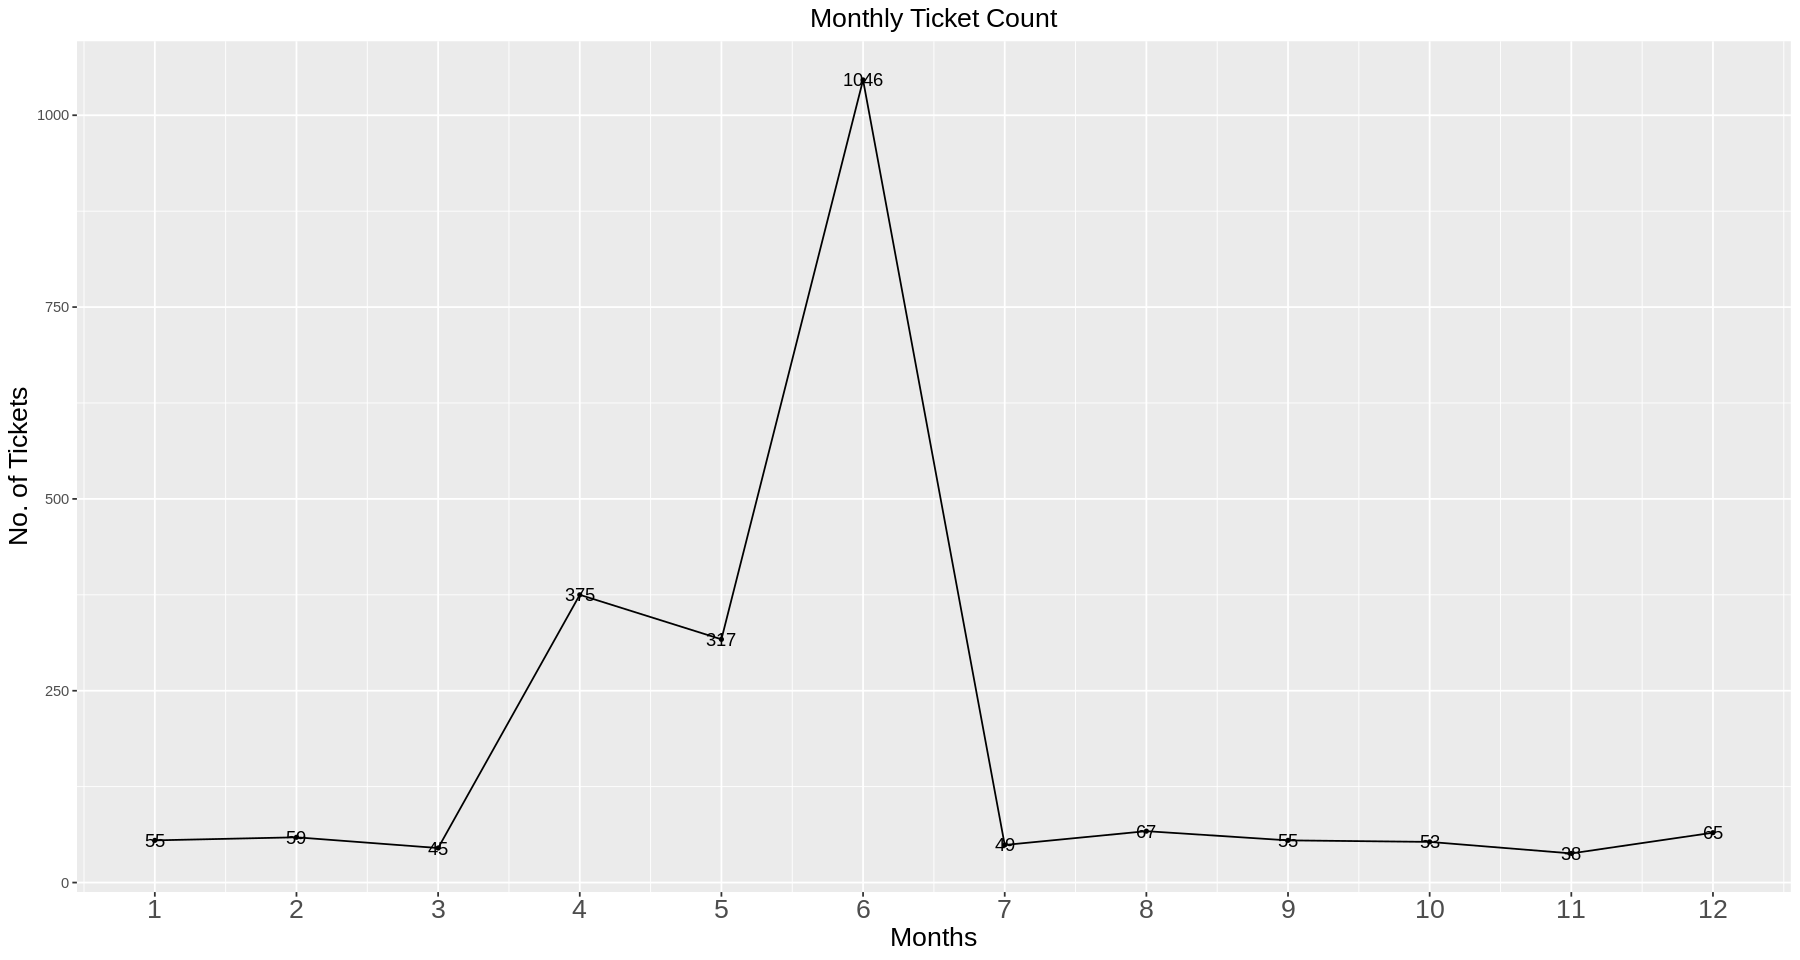

In [10]:
ggplot(data = monthly_count,aes(Month,Count,label = Count))+
        geom_line()+
        geom_point(size = 0.8)+
        geom_text()+
        scale_x_continuous(breaks = monthly_count$Month)+
        labs(title = "Monthly Ticket Count",x= "Months",y ="No. of Tickets")+
        theme(plot.title = element_text(size=16,hjust = 0.5),axis.text.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),axis.title.x = element_text(size = 16))

Number of tickets was maximum in the month of June. Number of tickets were high in April-May. Hence in Q1 high number of tickets were observed. In Q2 , Q3 and Q4 number of tickets were in the range of 45-70

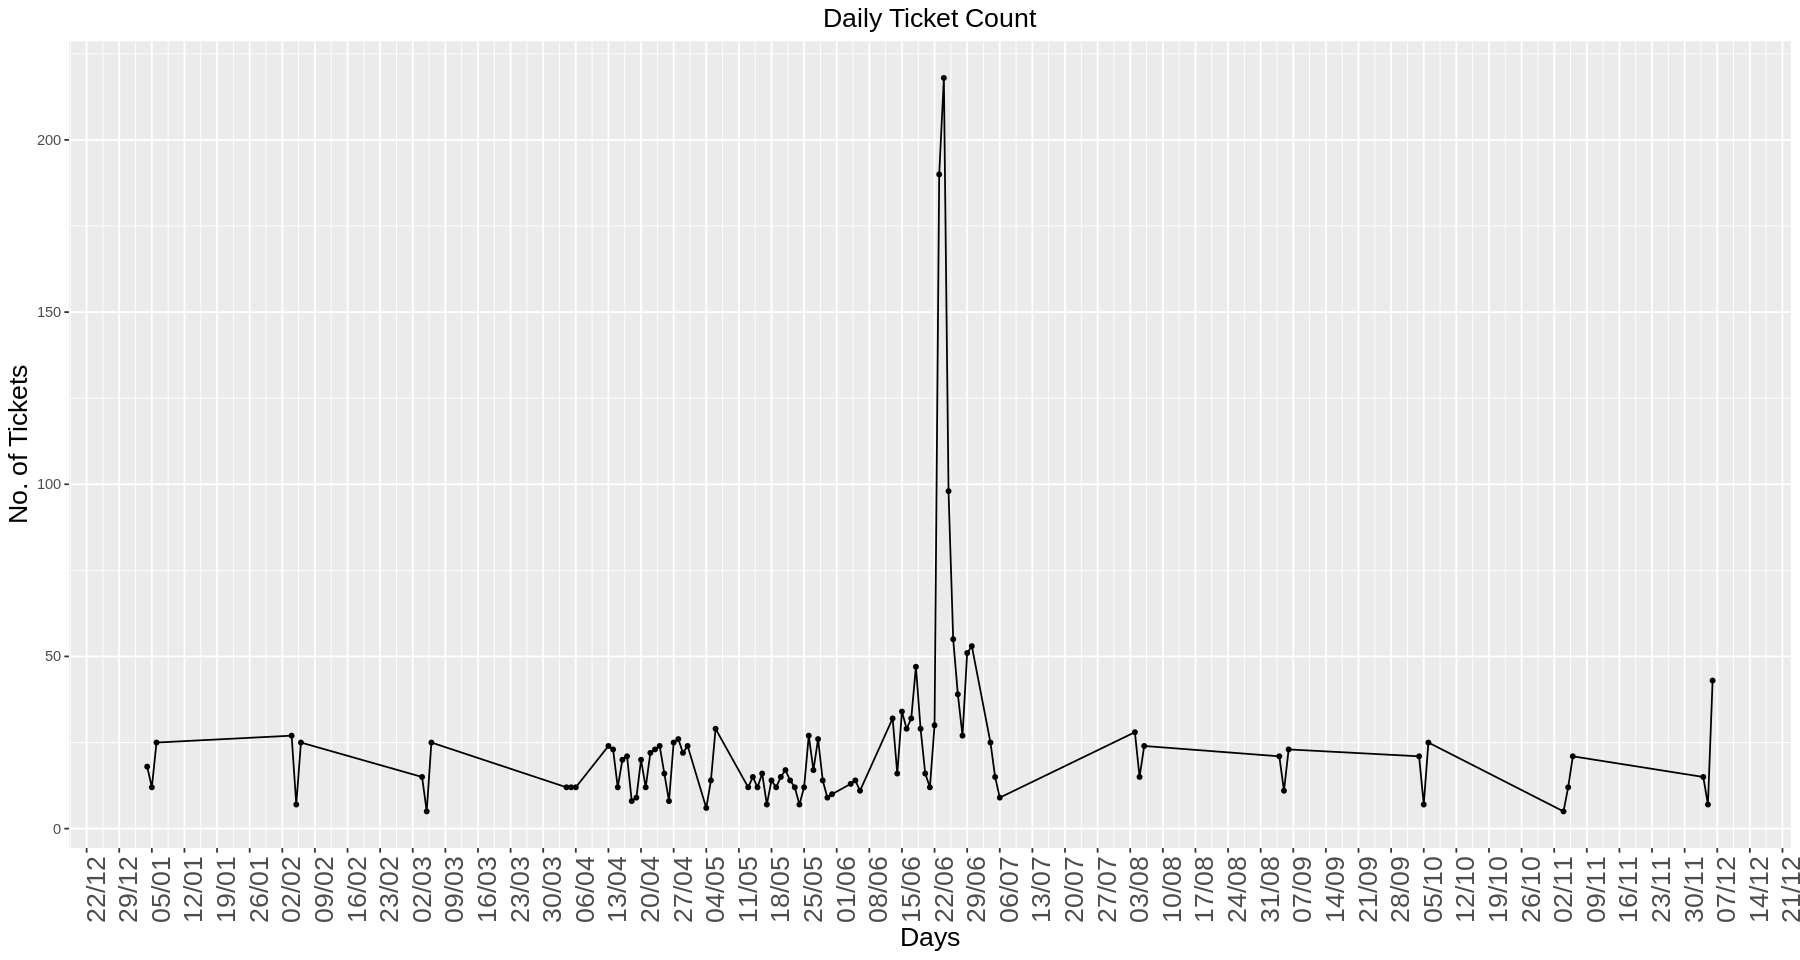

In [11]:
ggplot(data = daily_count,aes(as.POSIXct(Date),Count))+
        geom_line()+
        geom_point(size = 1)+
        scale_x_datetime(breaks = "1 weeks",date_labels = "%d/%m")+
        labs(size=28,title = "Daily Ticket Count",x= "Days",y ="No. of Tickets")+
        theme(axis.text.x = element_text(size=16,angle = 90),
              plot.title = element_text(size=16,hjust = 0.5),axis.title.y = element_text(size = 16),
              axis.title.x = element_text(size = 16))

 Provide a table with the frequency of complaint types.

In [12]:
# Complaint Type Processing
network_tickets<- contains(comcast_data$CustomerComplaint,match = 'network',ignore.case = T)
internet_tickets<- contains(comcast_data$CustomerComplaint,match = 'internet',ignore.case = T)
billing_tickets<- contains(comcast_data$CustomerComplaint,match = 'bill',ignore.case = T)
email_tickets<- contains(comcast_data$CustomerComplaint,match = 'email',ignore.case = T)
charges_ticket<- contains(comcast_data$CustomerComplaint,match = 'charge',ignore.case = T)

comcast_data$ComplaintType[internet_tickets]<- "Internet"
comcast_data$ComplaintType[network_tickets]<- "Network"
comcast_data$ComplaintType[billing_tickets]<- "Billing"
comcast_data$ComplaintType[email_tickets]<- "Email"
comcast_data$ComplaintType[charges_ticket]<- "Charges"

comcast_data$ComplaintType[-c(internet_tickets,network_tickets,
                              billing_tickets,charges_ticket,email_tickets)]<- "Others"

table(comcast_data$ComplaintType)


 Billing  Charges    Email Internet  Network   Others 
     363      139       16      472        1     1233 

Complain type can be categorised based on Customer Complain description. Complain can be categorised in six broad categories: Internet , Network , Billing , Email , Charges and Others based on keyword in Customer Complain. Highest complain was observeved in others category followed by Internet and Billing. 

Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [13]:
open_complaints<- (comcast_data$Status == "Open"| comcast_data$Status =="Pending")
closed_complaints<-(comcast_data$Status == "Closed"| comcast_data$Status =="Solved")
comcast_data$ComplaintStatus[ open_complaints]<-"Open" 
comcast_data$ComplaintStatus[closed_complaints]<- "Closed" 

Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

`summarise()` regrouping output by 'State' (override with `.groups` argument)



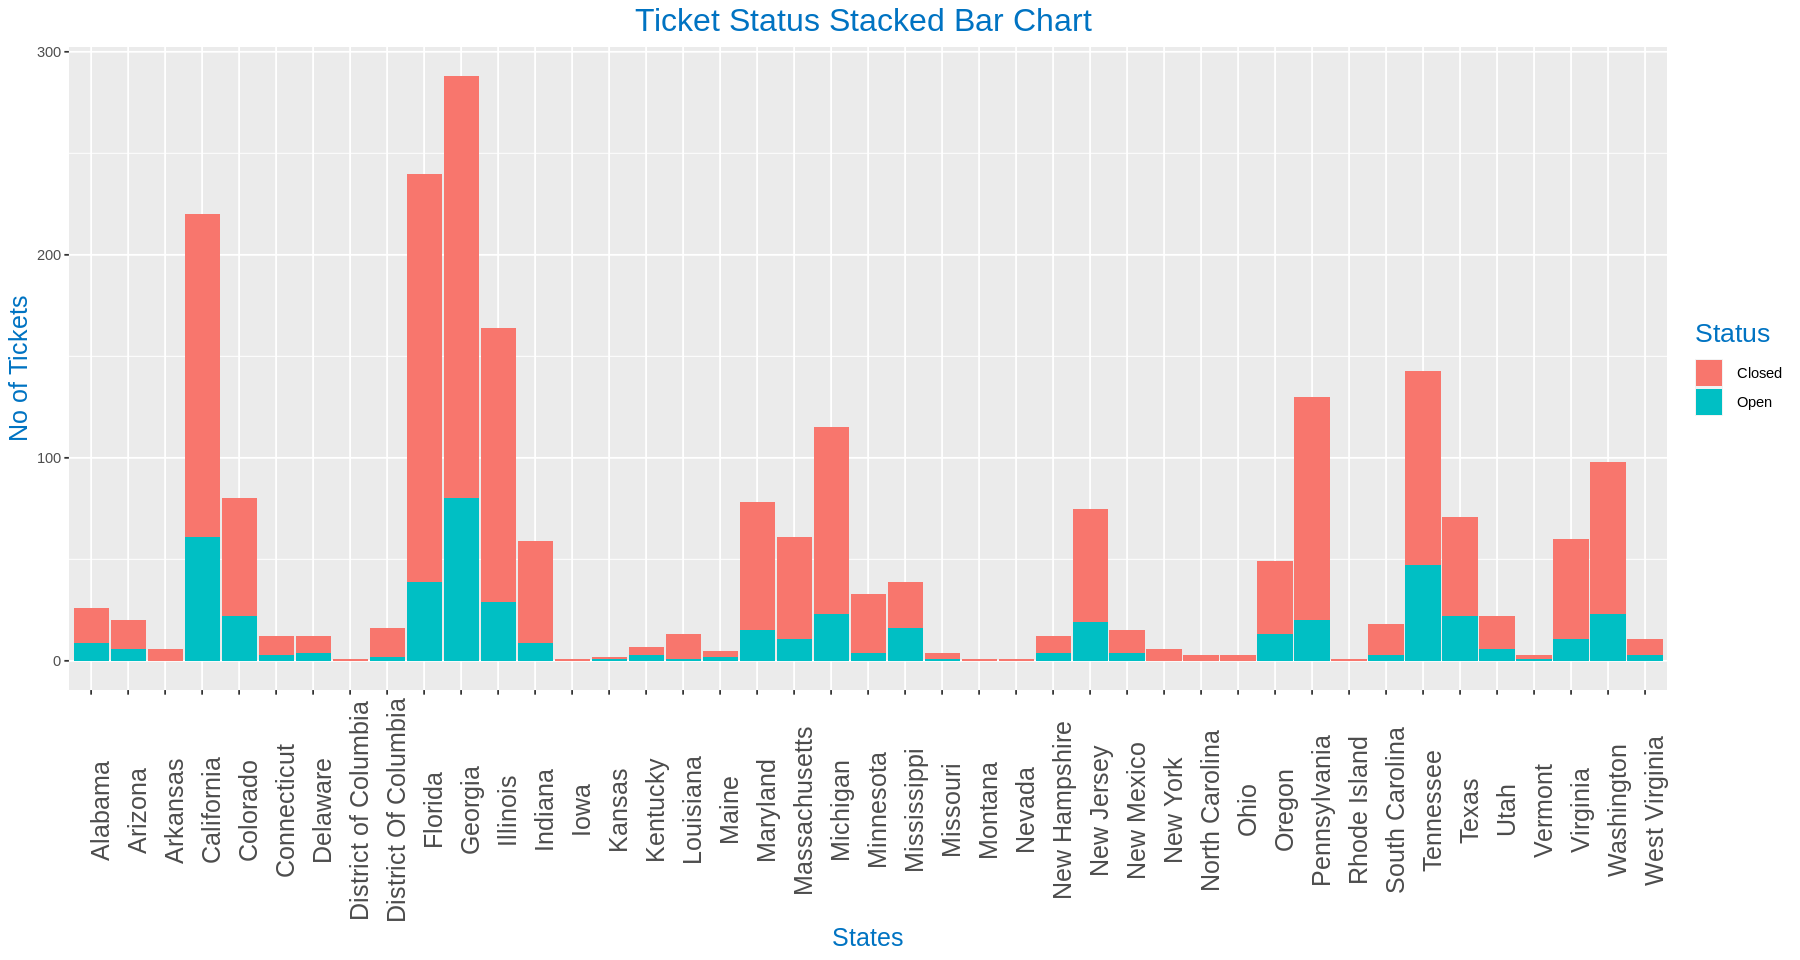

In [17]:
comcast_data<- group_by(comcast_data,State,ComplaintStatus)
chart_data<- summarise(comcast_data,Count = n())
ggplot(as.data.frame(chart_data) ,mapping = aes(State,Count))+
      geom_col(aes(fill = ComplaintStatus),width = 0.95)+
      theme(axis.text.x = element_text(angle = 90,size=15),
            axis.title.y = element_text(size = 15),
            axis.title.x = element_text(size = 15),
            title = element_text(size = 16,colour = "#0073C2FF"),
            plot.title = element_text(hjust =  0.5))+
      labs(title = "Ticket Status Stacked Bar Chart ",
           x = "States",y = "No of Tickets",
           fill= "Status")

Which state has the maximum complaints

In [18]:
#State having the maximum complaints (total)
max_comp <- arrange(summarise(group_by(comcast_data, State), Count = n()), desc(Count))
max_comp[1,]

`summarise()` ungrouping output (override with `.groups` argument)



State,Count
<chr>,<int>
Georgia,288


In [19]:
#State having the maximum Open complaints
max_open_comp <- arrange(summarise(group_by(filter(comcast_data, ComplaintStatus == "Open"), State), Count = n()), desc(Count))
max_open_comp[1,]

`summarise()` ungrouping output (override with `.groups` argument)



State,Count
<chr>,<int>
Georgia,80


Which state has the highest percentage of unresolved complaints.

Provide the percentage of complaints resolved till date, which were received through theInternet and customer care calls.

In [20]:
#State having the highest percentage of unresolved complaints
count_by_states <- merge(x = max_comp, y = max_open_comp, by = "State", all.x = TRUE)
count_by_states$Count.y <- ifelse(is.na(count_by_states$Count.y),0,count_by_states$Count.y)
count_by_states <- cbind(count_by_states, "% unresolved" = count_by_states$Count.y / count_by_states$Count.x * 100)
count_by_states <- arrange(count_by_states, desc(count_by_states["% unresolved"]))
count_by_states[1,]

,State,Count.x,Count.y,% unresolved
,<chr>,<int>,<dbl>,<dbl>
1,Kansas,2,1,50


In [21]:
#Number of closed and open calls
table(comcast_data$ComplaintStatus)


Closed   Open 
  1707    517 

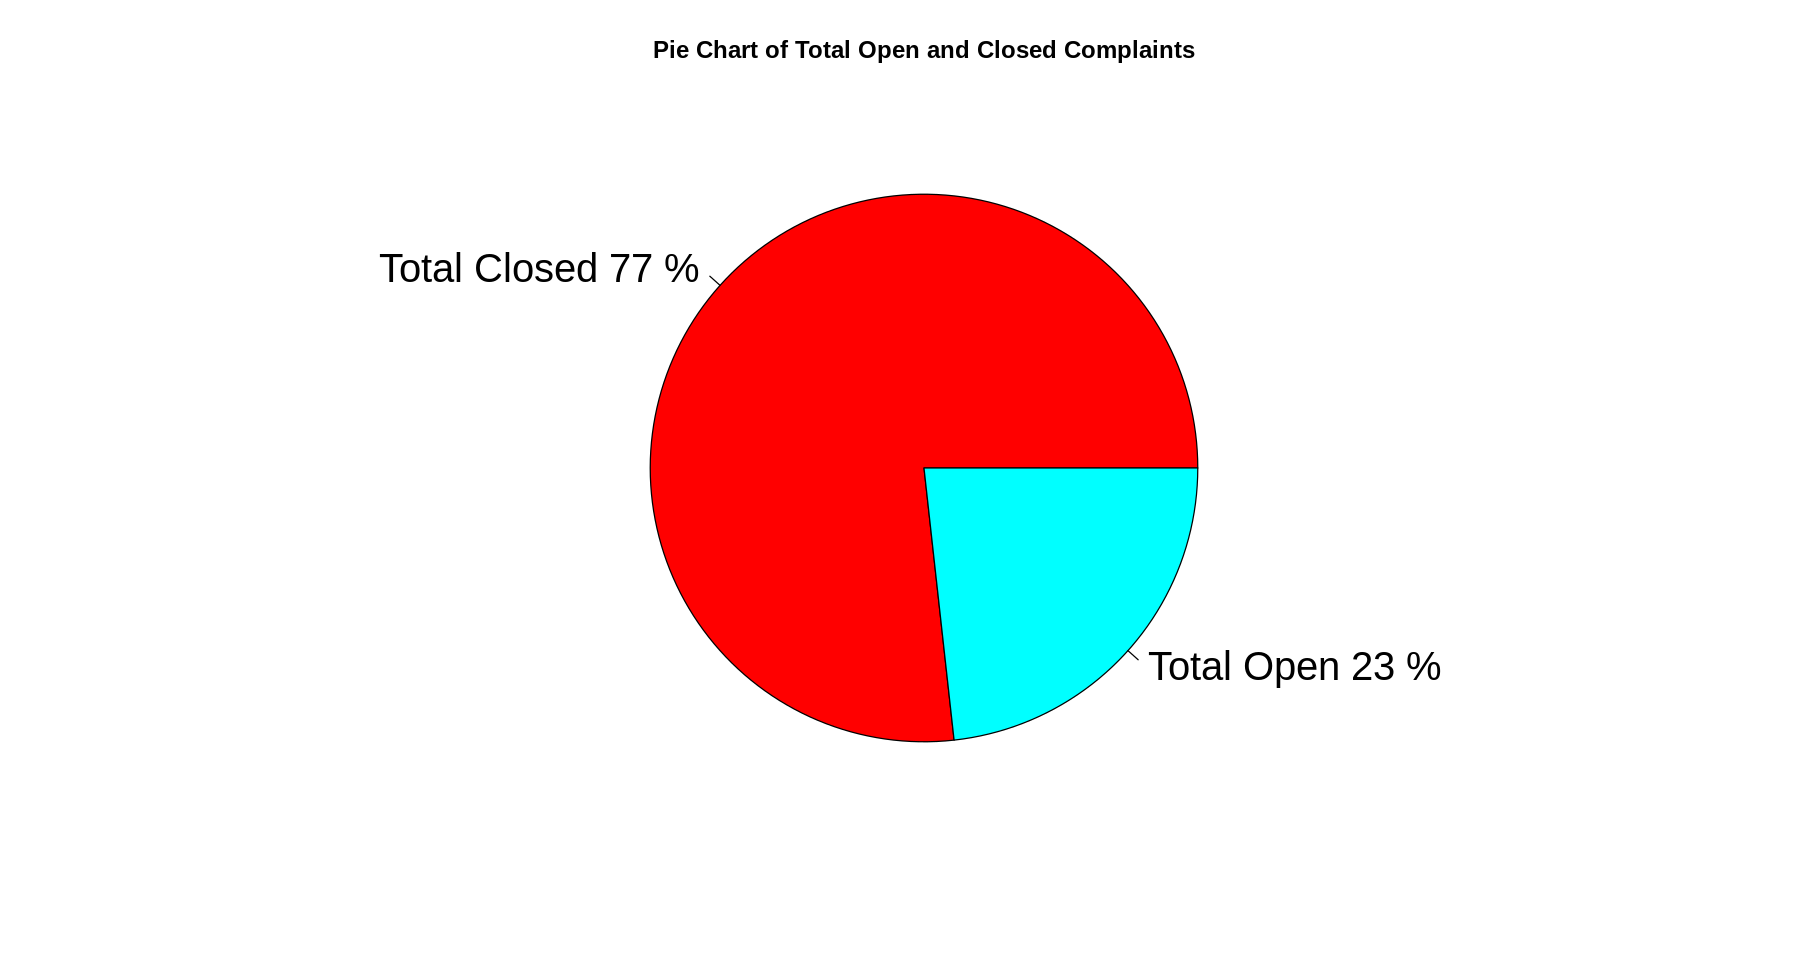

In [37]:
# Pie Chart for Total Closed and Open Complaints
slices <- c(1707, 517)
names <- c("Total Closed", "Total Open")
slices_per <- round(slices/sum(slices)*100)
slices_per <- as.character(slices_per)
slices_names_per <- paste(names, slices_per,"%")
pie(x=slices,labels = slices_names_per, col=rainbow(length(names)),
    main="Pie Chart of Total Open and Closed Complaints",cex=2)

In [23]:
#percentage of complaints resolved till date, received through the Internet and customer care calls
levels(as.factor(comcast_data$ReceivedVia))
df2 <- table(comcast_data$ReceivedVia, comcast_data$ComplaintStatus)
df2 <- cbind(df2, Total = rowSums(df2))
df2

[1] "Customer Care Call" "Internet"

,Closed,Open,Total
Customer Care Call,864,255,1119
Internet,843,262,1105


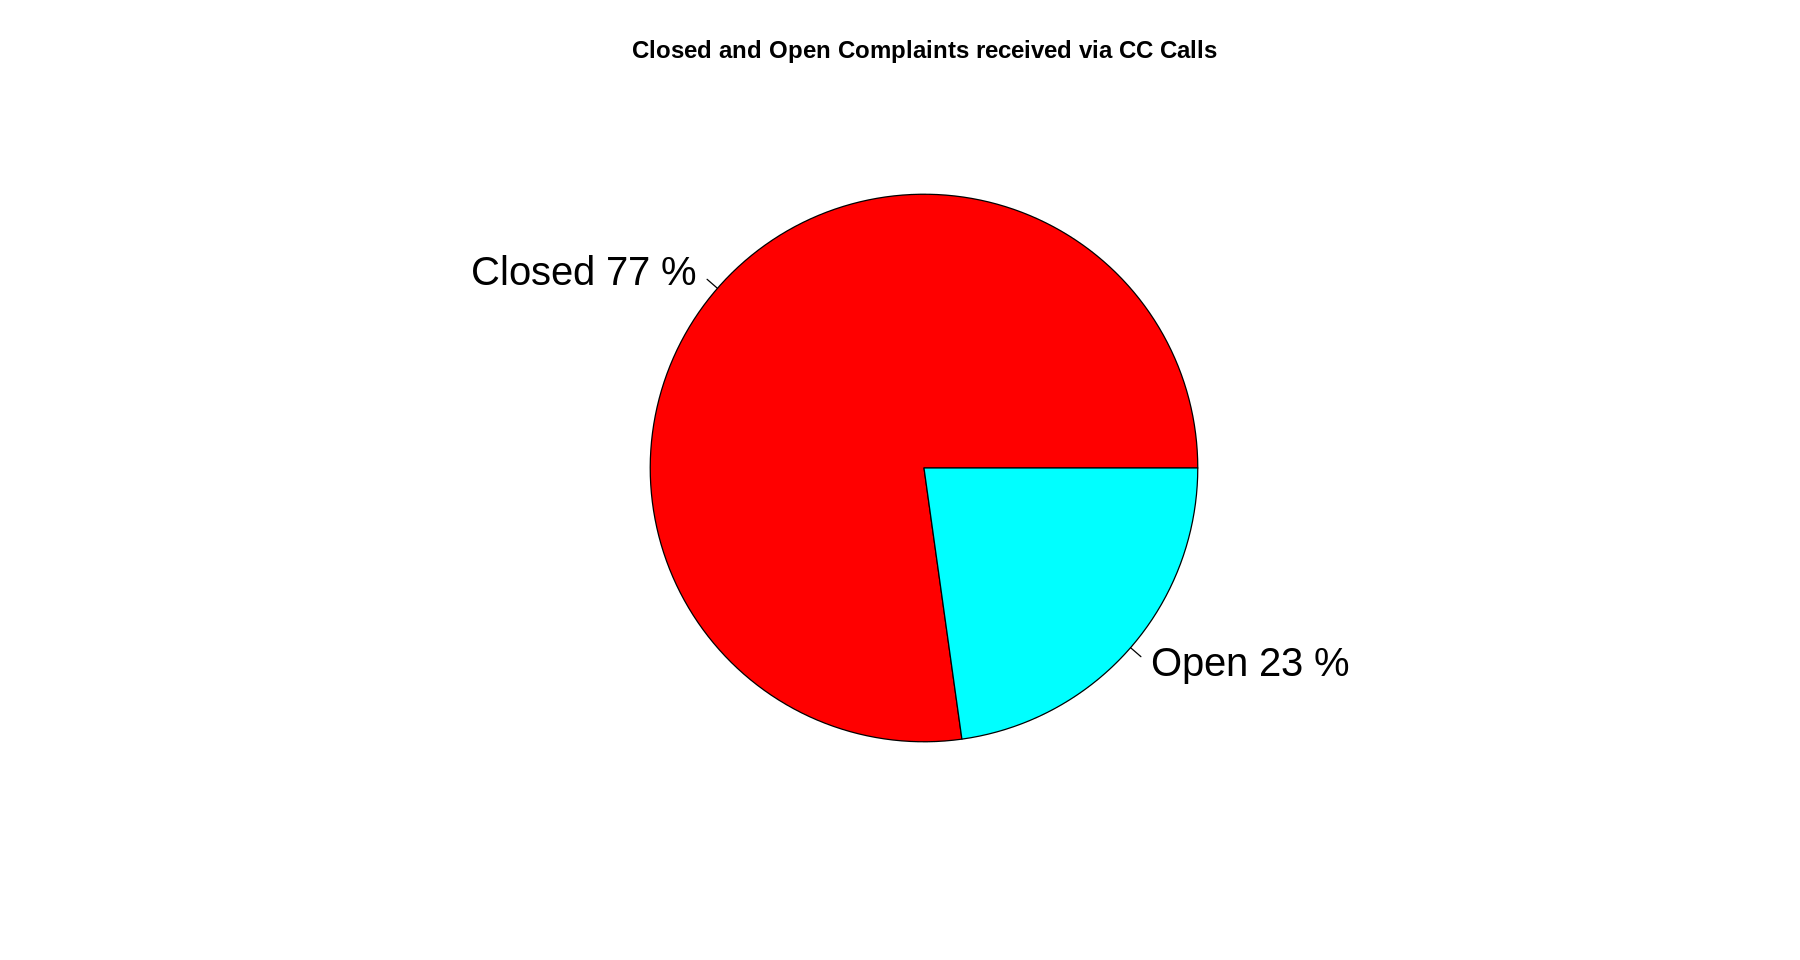

In [33]:
# Pie Chart for Closed and Open Complaints received via Customer Care Calls
slices1 <- c(864, 255)
names1 <- c("Closed", "Open")
slices_per1 <- round(slices1/sum(slices1)*100)
slices_per1 <- as.character(slices_per1)
slices_names_per1 <- paste(names1, slices_per1,"%")
pie(x=slices1,labels = slices_names_per1, col=rainbow(length(names1)),
    main="Closed and Open Complaints received via CC Calls",cex=2,font=32)

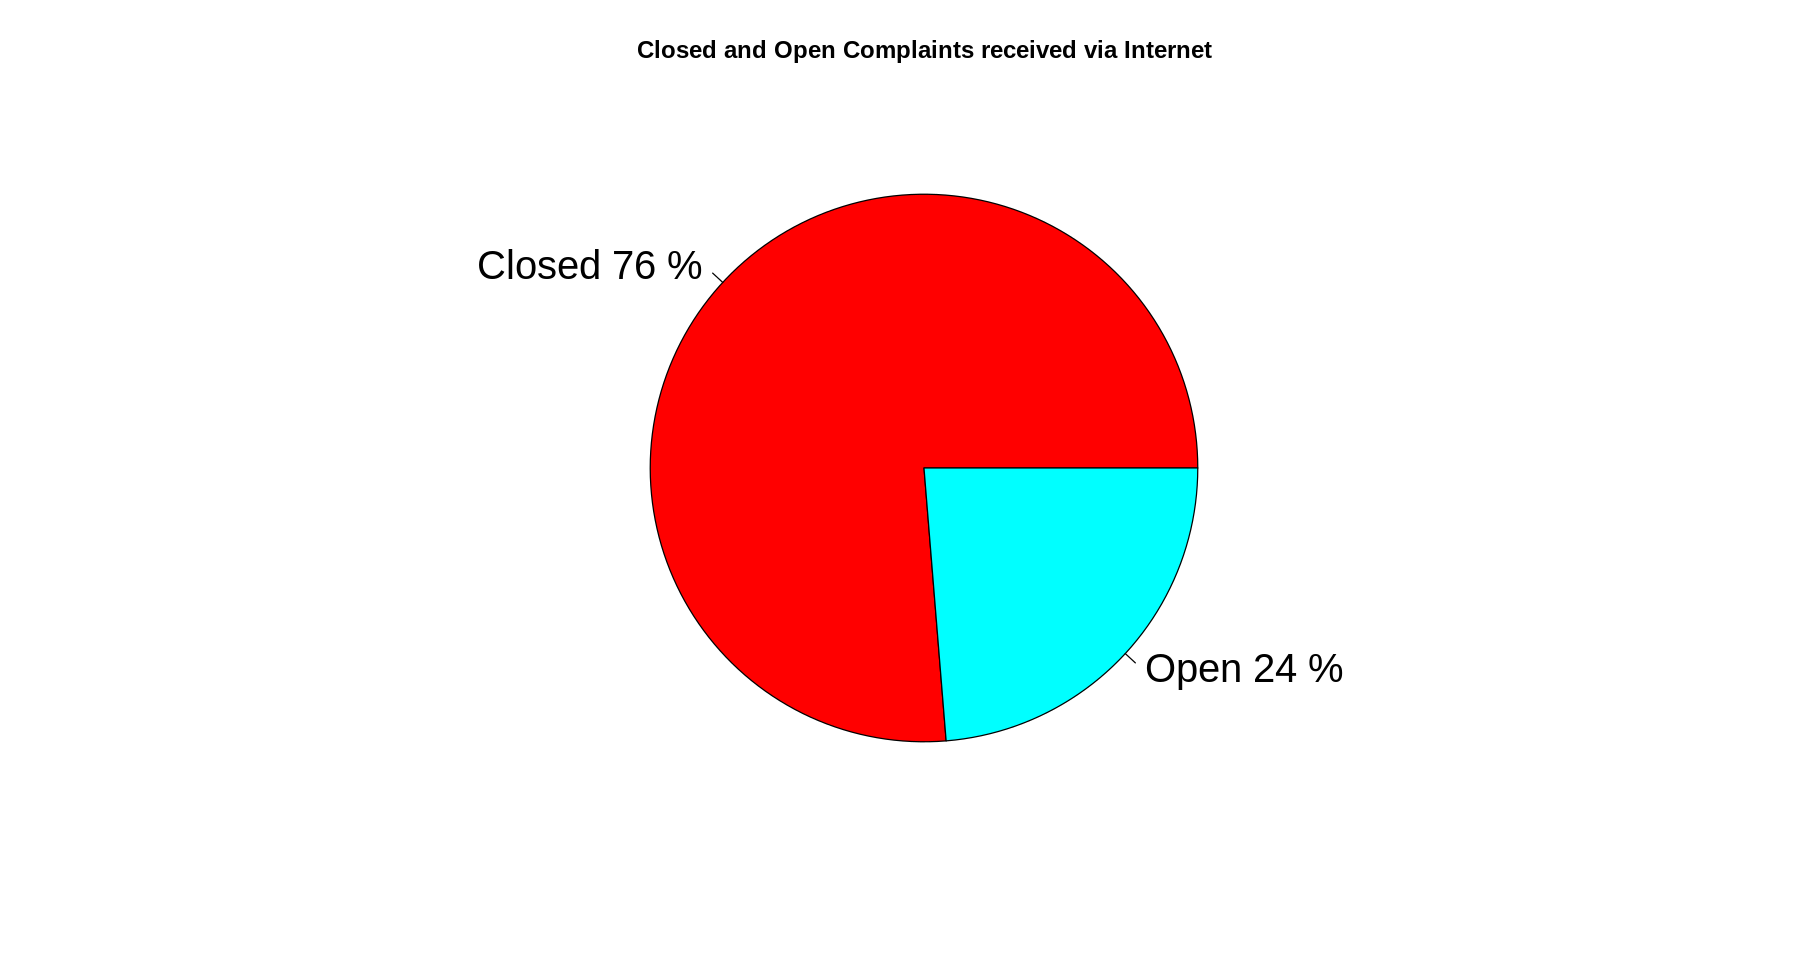

In [30]:
# Pie Chart for Closed and Open Complaints received via Internet
slices2 <- c(843, 262)
names2 <- c("Closed", "Open")
slices_per2 <- round(slices2/sum(slices2)*100)
slices_per2 <- as.character(slices_per2)
slices_names_per2 <- paste(names2, slices_per2,"%")
pie(x=slices2,labels = slices_names_per2, col=rainbow(length(names2)),
    main="Closed and Open Complaints received via Internet",cex=2)

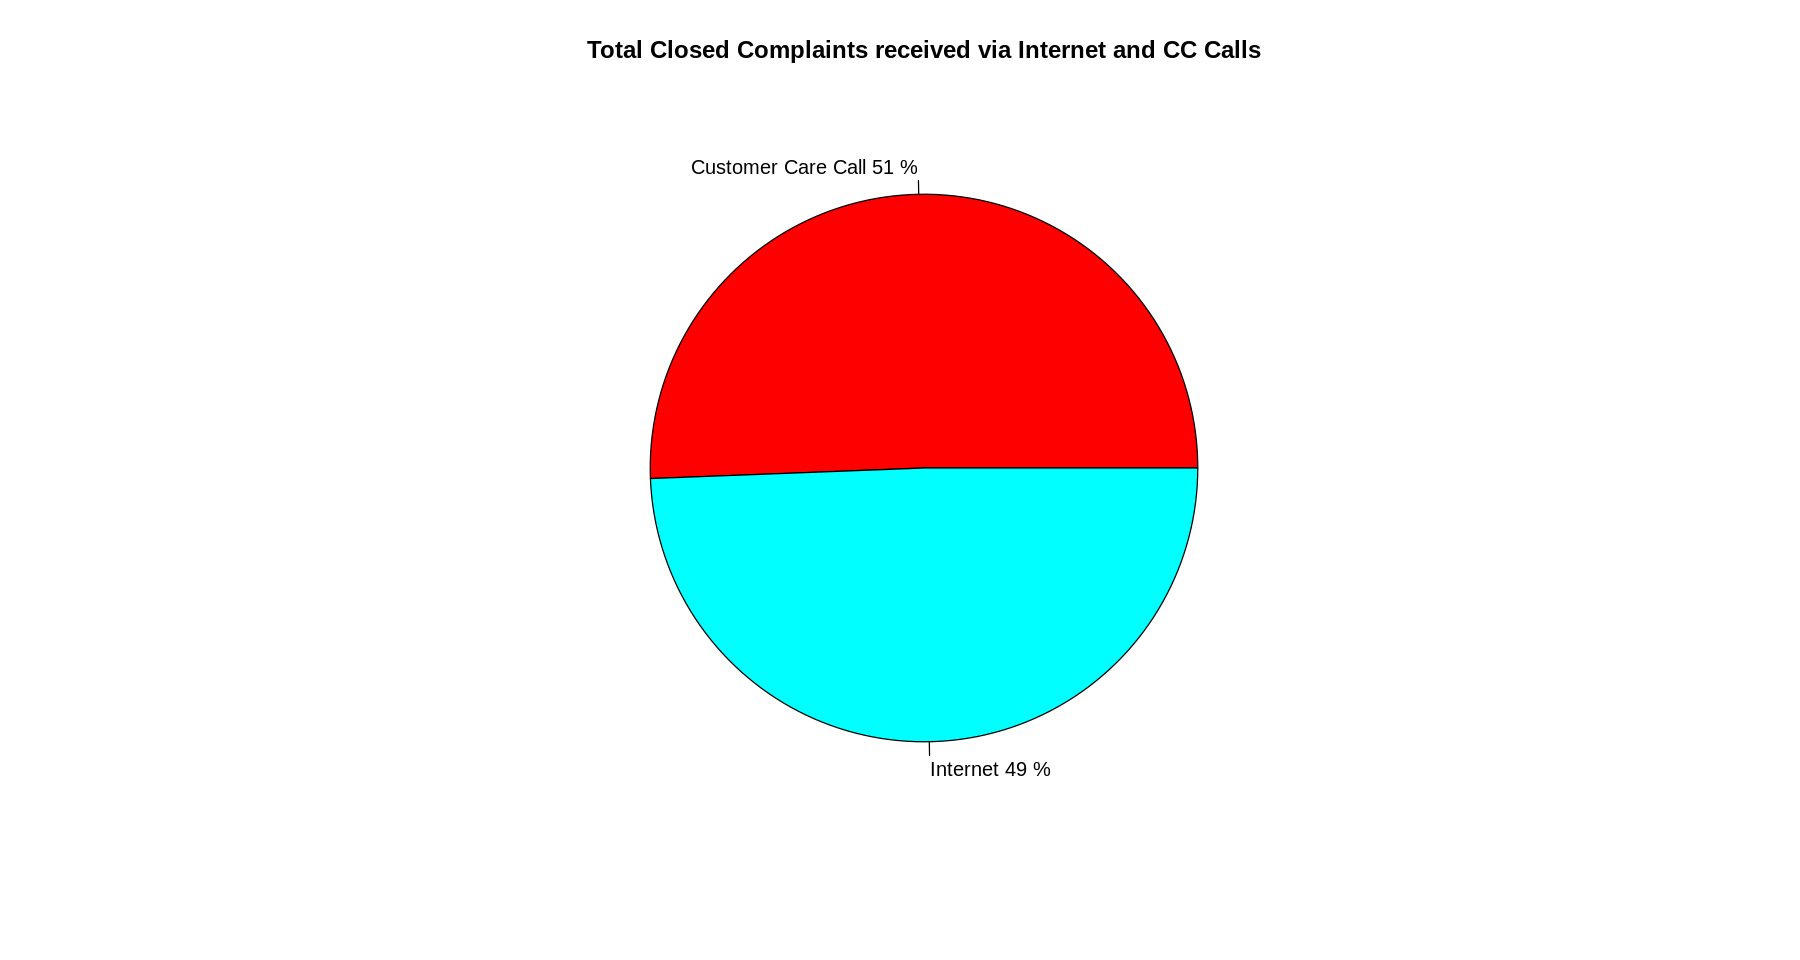

In [26]:
# Pie Chart for Total Closed Complaints received via Internet and Customer Care Call
slices3 <- c(864, 843)
names3 <- c("Customer Care Call", "Internet")
slices_per3 <- round(slices3/sum(slices3)*100)
slices_per3 <- as.character(slices_per3)
slices_names_per3 <- paste(names3, slices_per3,"%")
pie(x=slices3,labels = slices_names_per3, col=rainbow(length(names3)),
    main="Total Closed Complaints received via Internet and CC Calls")

From the Pie chart above it can be seen that Total Resolved complaints is 77% and total Unresolved complaints is 23%. For Complaints, received via Customer Care Call, 77% are Closed and 23% are Open. For Complaints, received via the Internet 76% are Closed and 24% are Open. For all complaints which are Resolved/Closed, 51% of those were received via Customer Care Call and the rest of 49% were received via Internet.

Insights:
According to the above analysis,number of tickets was maximum in the month of June. Number of tickets were high in April-May. Hence in Q1 high number of tickets were observed. In Q2 , Q3 and Q4 number of tickets were in the range of 45-70.
Highest amount of complaints has been received from Georgia. It also has the highest number of Open complaints.
For Complaints, received via Customer Care Call, 77% are Closed and 23% are Open.
For Complaints, received via the Internet 76% are Closed and 24% are Open.
It can be concluded that there is no discrepancy in resolving complaints between complaints logged via Customer Care call and logged via Internet.
Out of all complaints 77% are already closed and 23% complaints are still open